In [61]:
import numpy as np
import cv2 as cv
import os
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# MUST CLEAN UP INTO FUNCTIONS AND STUFF

In [71]:
# Step 1 - Signal Differentiation
path = glob.glob("./images_rgb/*.jpg")
cv_img = []
for img in tqdm(path):
    n = cv.imread(img)
    img_array = cv.resize(n, (320, 240))
    img_array = cv.cvtColor(img_array, cv.COLOR_RGB2GRAY)
    cv_img.append(img_array)
 
c = np.asarray(cv_img)
 
print(c.shape)
 
avg_red = []

100%|██████████| 100/100 [00:02<00:00, 38.97it/s]

(100, 240, 320)


In [78]:
for i in range(99):
    avg_red.append(int(abs(np.mean(c[i] - c[i + 1]))))
    red = np.asarray(avg_red)

## Step 2 - Collect set of highest peaks

In [76]:
peaks, _ = find_peaks(red, distance=5)

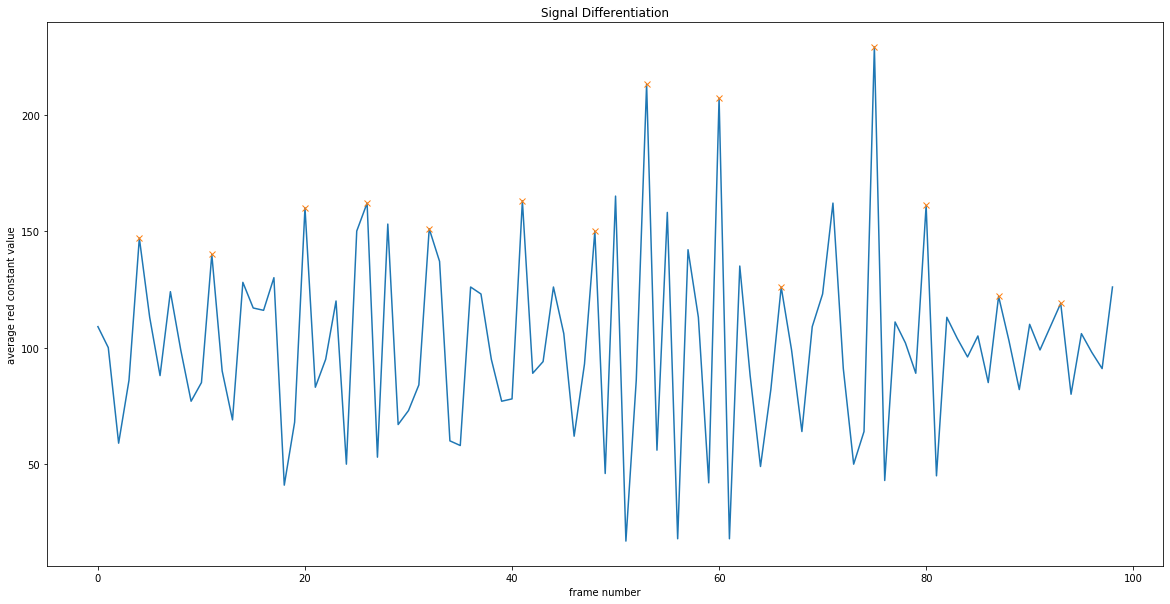

In [77]:
plt.figure(figsize=(20,10))
plt.title("Signal Differentiation")
plt.ylabel("average red constant value")
plt.xlabel("frame number")
plt.plot(red[:150])
plt.plot(peaks[:150], red[peaks[:150]], "x")
plt.show()

In [ ]:
# TODO:
## Step 3 - Calculate variances of distance between peaks